## Use Heart Disease [Dataset](https://github.com/cksajil/DSAIRP25/blob/main/datasets/heart_disease.csv) and answer the following questions

## 1. Find the top 5 important features to the target column

In [1]:
import pandas as pd
import matplotlib.pyplot

data = pd.read_csv("heart_disease.csv")
num_df = data.select_dtypes(include=['int64', 'float64'])
num_cols = num_df.columns.tolist()

num_df_scaled = pd.DataFrame(num_df, columns=num_cols)
correlations = num_df_scaled.corr()["target"].drop("target")
sorted_corr = correlations.abs().sort_values(ascending=False)

top_5_features = sorted_corr.head(5)
print("Top 5 important features to the target column:")
print(top_5_features)

Top 5 important features to the target column:
oldpeak    0.438441
exang      0.438029
cp         0.434854
thalach    0.422895
ca         0.382085
Name: target, dtype: float64


## 2. Perform Box-Cox Transformations to relevant features

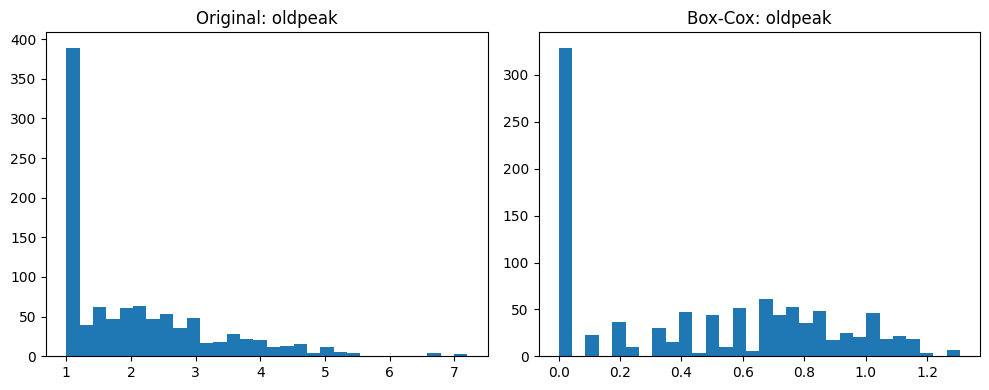

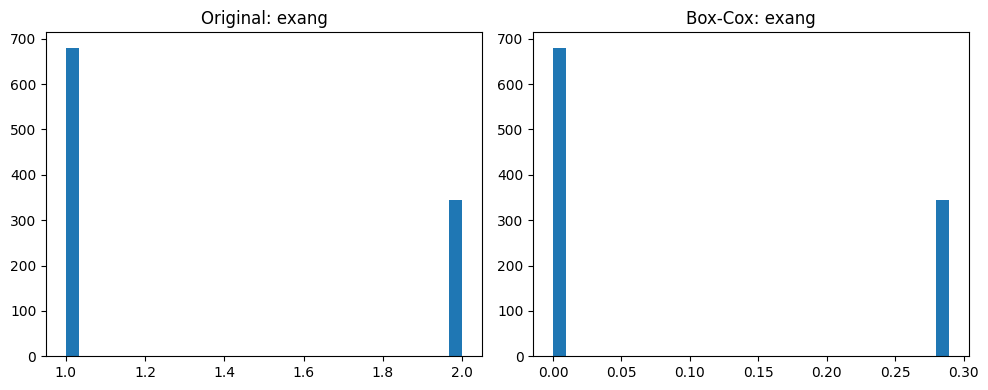

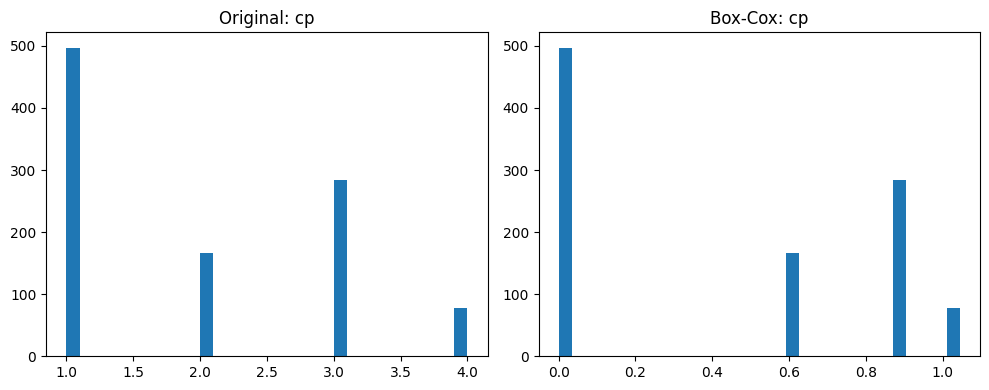

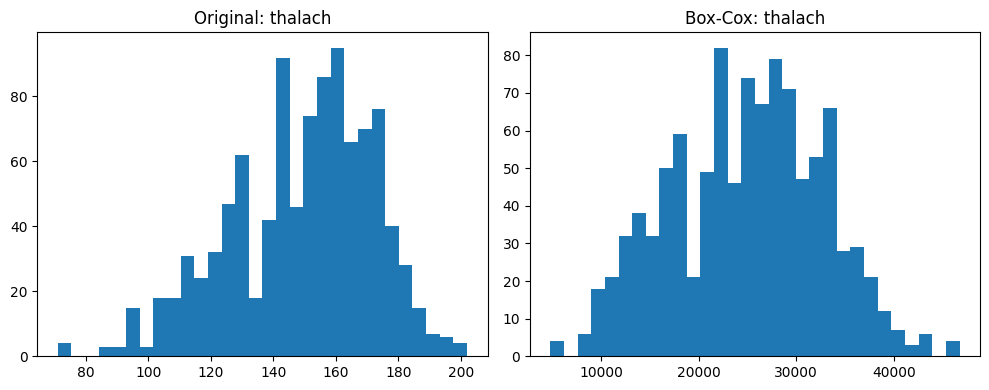

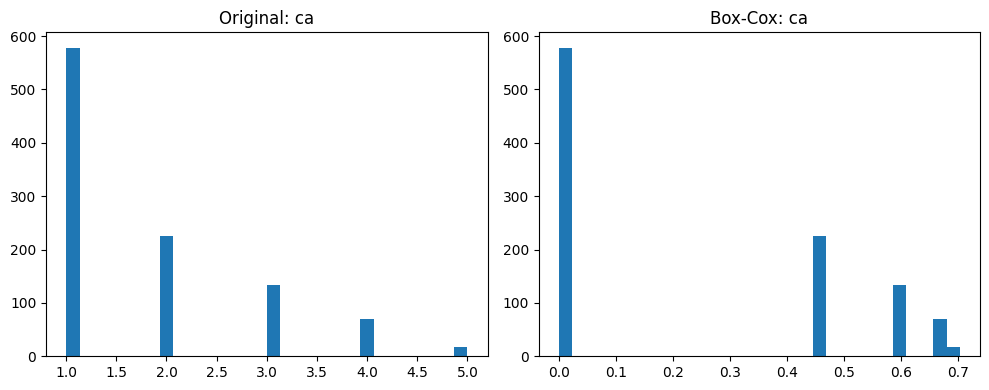

In [2]:
from scipy import stats
import matplotlib.pyplot as plt

boxcox_results = {}

for feature in ['oldpeak', 'exang', 'cp', 'thalach', 'ca']:
    col_data = data[feature].dropna()
    if (col_data <= 0).any():
        col_data = col_data + 1
    transformed_data, lambda_value = stats.boxcox(col_data)
    boxcox_results[feature] = (transformed_data, lambda_value)
    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(col_data, bins=30)
    plt.title(f"Original: {feature}")

    plt.subplot(1, 2, 2)
    plt.hist(transformed_data, bins=30)
    plt.title(f"Box-Cox: {feature}")
    plt.tight_layout()
    plt.show()

## 3. Perform Feature Binning to Age Column and add it as a new column to the dataset

In [3]:
bins = [data['age'].min(), 40, 60, data['age'].max()]
labels = ['Young', 'Middle-aged', 'Senior']
data['age_binned'] = pd.cut(data['age'], bins=bins, labels=labels, include_lowest=True)
print(data[['age', 'age_binned']].head())

   age   age_binned
0   52  Middle-aged
1   53  Middle-aged
2   70       Senior
3   61       Senior
4   62       Senior


## 4. Find the most orthogonal feature to the 'chol' feature

In [4]:
import pandas as pd

data = pd.read_csv("heart_disease.csv")

num_df = data.select_dtypes(include=['int64', 'float64'])

correlations = num_df.corr()
chol_corr = correlations['chol'].drop('chol')
most_orthogonal_feature = chol_corr.abs().sort_values().index[0]
print("Most orthogonal feature to 'chol':", most_orthogonal_feature)

Most orthogonal feature to 'chol': slope
